# INTRODUCTION
<br>
We have a data which classified if patients have cardiovascular disease or not according to features in it. We will try to use this data to create a model which tries to detect if a patient has this disease or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

sns.set_style("white")

## Read Data

In [2]:
df = pd.read_csv('cardio_train.csv',delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# First 5 rows of our data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


### Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary | (TARGET)

## Data Cleaning & EDA

In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
#Checking Duplication and Missing Values 
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 24 duplicated values in data frame


In [6]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(6) # Show us just examples of duplications

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1978,22077,1,175,69.0,120,80,1,1,0,0,1,1
45049,22077,1,175,69.0,120,80,1,1,0,0,1,1
869,21945,1,165,60.0,120,80,1,1,0,0,1,0
48218,21945,1,165,60.0,120,80,1,1,0,0,1,0
39602,21943,1,165,65.0,120,80,1,1,0,0,1,1
51853,21943,1,165,65.0,120,80,1,1,0,0,1,1


In [7]:
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [8]:
# Drop Nulls 
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (69277, 12)
post shape:  (69277, 12)


In [9]:
#Detect outliers 
feature_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in feature_list:
    Q1 = df[each].quantile(0.25)
    Q3 = df[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [10]:
ap_hi_filter = (df["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (df["ap_lo"] > boundary["ap_lo"][1]) 
outlier_filter = (ap_hi_filter | ap_lo_filter)
df_outliers = df[outlier_filter]
df_outliers["cardio"].value_counts()

1    1999
0     385
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

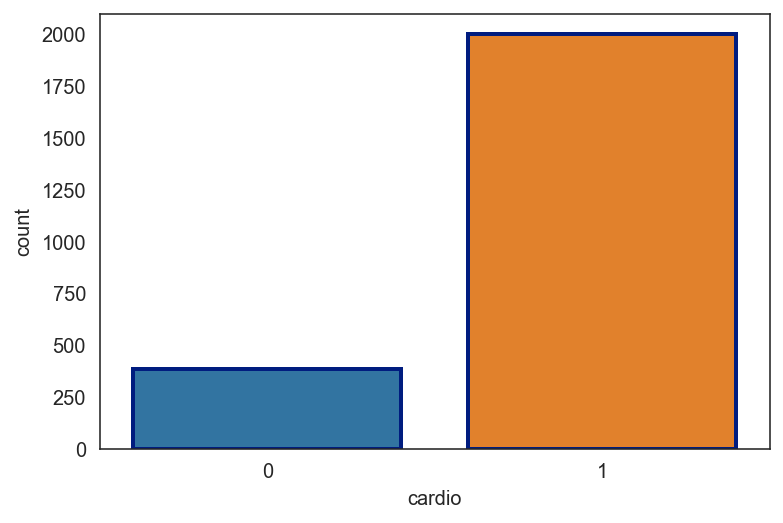

In [11]:
sns.countplot(x='cardio',data=df_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.

Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200 without fear of missing data.

In [12]:
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 983 outlier


In [13]:
df = df[~out_filter]

## Feature Engineering 

In [14]:
#Let's get age in years
df['age']= df['age']//365

C:\Users\HP\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


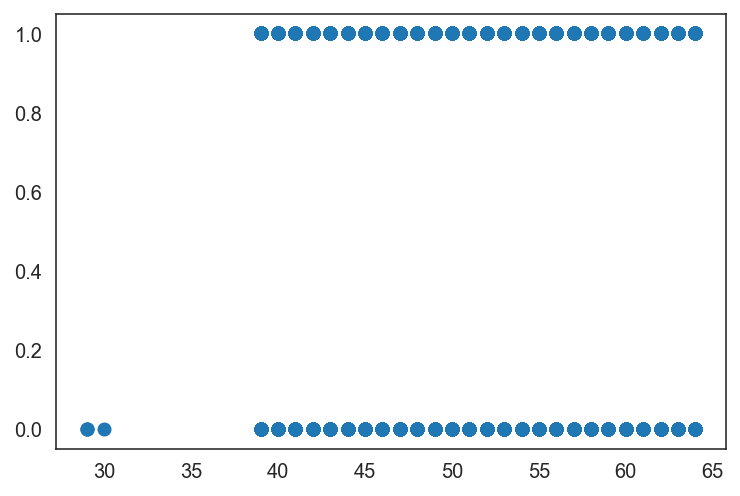

In [15]:
plt.scatter(df.age,df.cardio)

* Notice there are some outliers in the scatterplot, let's remove them. 

In [16]:
df.loc[df.age <= 35]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5520,29,1,175,59.0,120,80,1,1,0,0,1,0
21644,29,2,175,92.0,100,60,1,1,0,0,1,0
29967,29,1,159,59.0,120,80,1,1,0,0,1,0
55206,30,1,160,59.0,110,70,1,1,0,0,1,0


In [17]:
out_filter = ((df["age"]<35) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 4 outlier


In [18]:
df = df[~out_filter]

#### Height and weight seems uncorrelated with the cardio feature but Body Mass Index could be helpful to train our model.

In [19]:
def bmi_calc(w, h):
    return w/(h**2)

In [20]:
df["bmi"] = round(df["weight"]/ (df["height"]/100)**2,1)

In [21]:
#detect ouliers
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
min_value = Q1 - (1.5 * IQR)
max_value = Q3 + (1.5 * IQR)
print(min_value)
print(max_value)

14.599999999999994
39.400000000000006


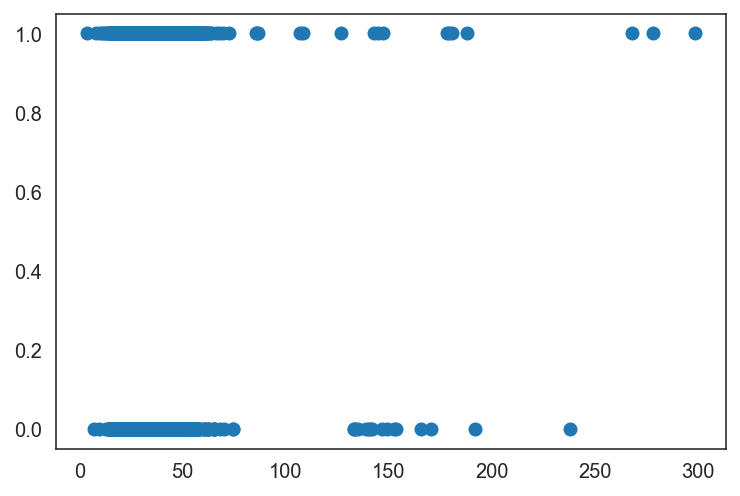

In [22]:
plt.scatter(df['bmi'],df['cardio'])

In [23]:
df.loc[df.bmi >= 100].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
5454,57,1,122,161.0,120,80,1,1,0,0,1,1,108.2
6899,40,2,70,72.0,120,8,1,1,0,0,1,0,146.9
7472,48,2,97,170.0,160,100,1,1,1,0,1,1,180.7
12071,53,1,75,168.0,120,80,1,1,1,0,1,1,298.7
12566,61,2,71,68.0,120,80,3,1,0,0,1,0,134.9


According to Wikipedia online, the maximum BMI ever recorded is 185.5 and based on the scatter-plot graph, we can drop the bmi outlier values over 100.

In [24]:
out_filter = ((df["bmi"]>100) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 29 outlier


In [25]:
df = df[~out_filter]

* Women have many of the same risk factors with men for heart disease as men, such as smoking, high blood pressure, and high cholesterol especially after 65.
* Thus we shouldn't categorize them into 1 and 2 because of 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to men for having a disease
* Therefore for gender, let's give it a binary data: 0 (female) / 1 (male) 
* We did not change other categorical code to one hot encoding because they express really hierarchical size

In [26]:
df["gender"] = df["gender"] % 2

In [27]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,61,1,155,69.0,130,80,2,2,0,0,1,0,28.7
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.7
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.7
3,39,0,165,85.0,120,80,1,1,1,1,1,0,31.2
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.8


<AxesSubplot:>

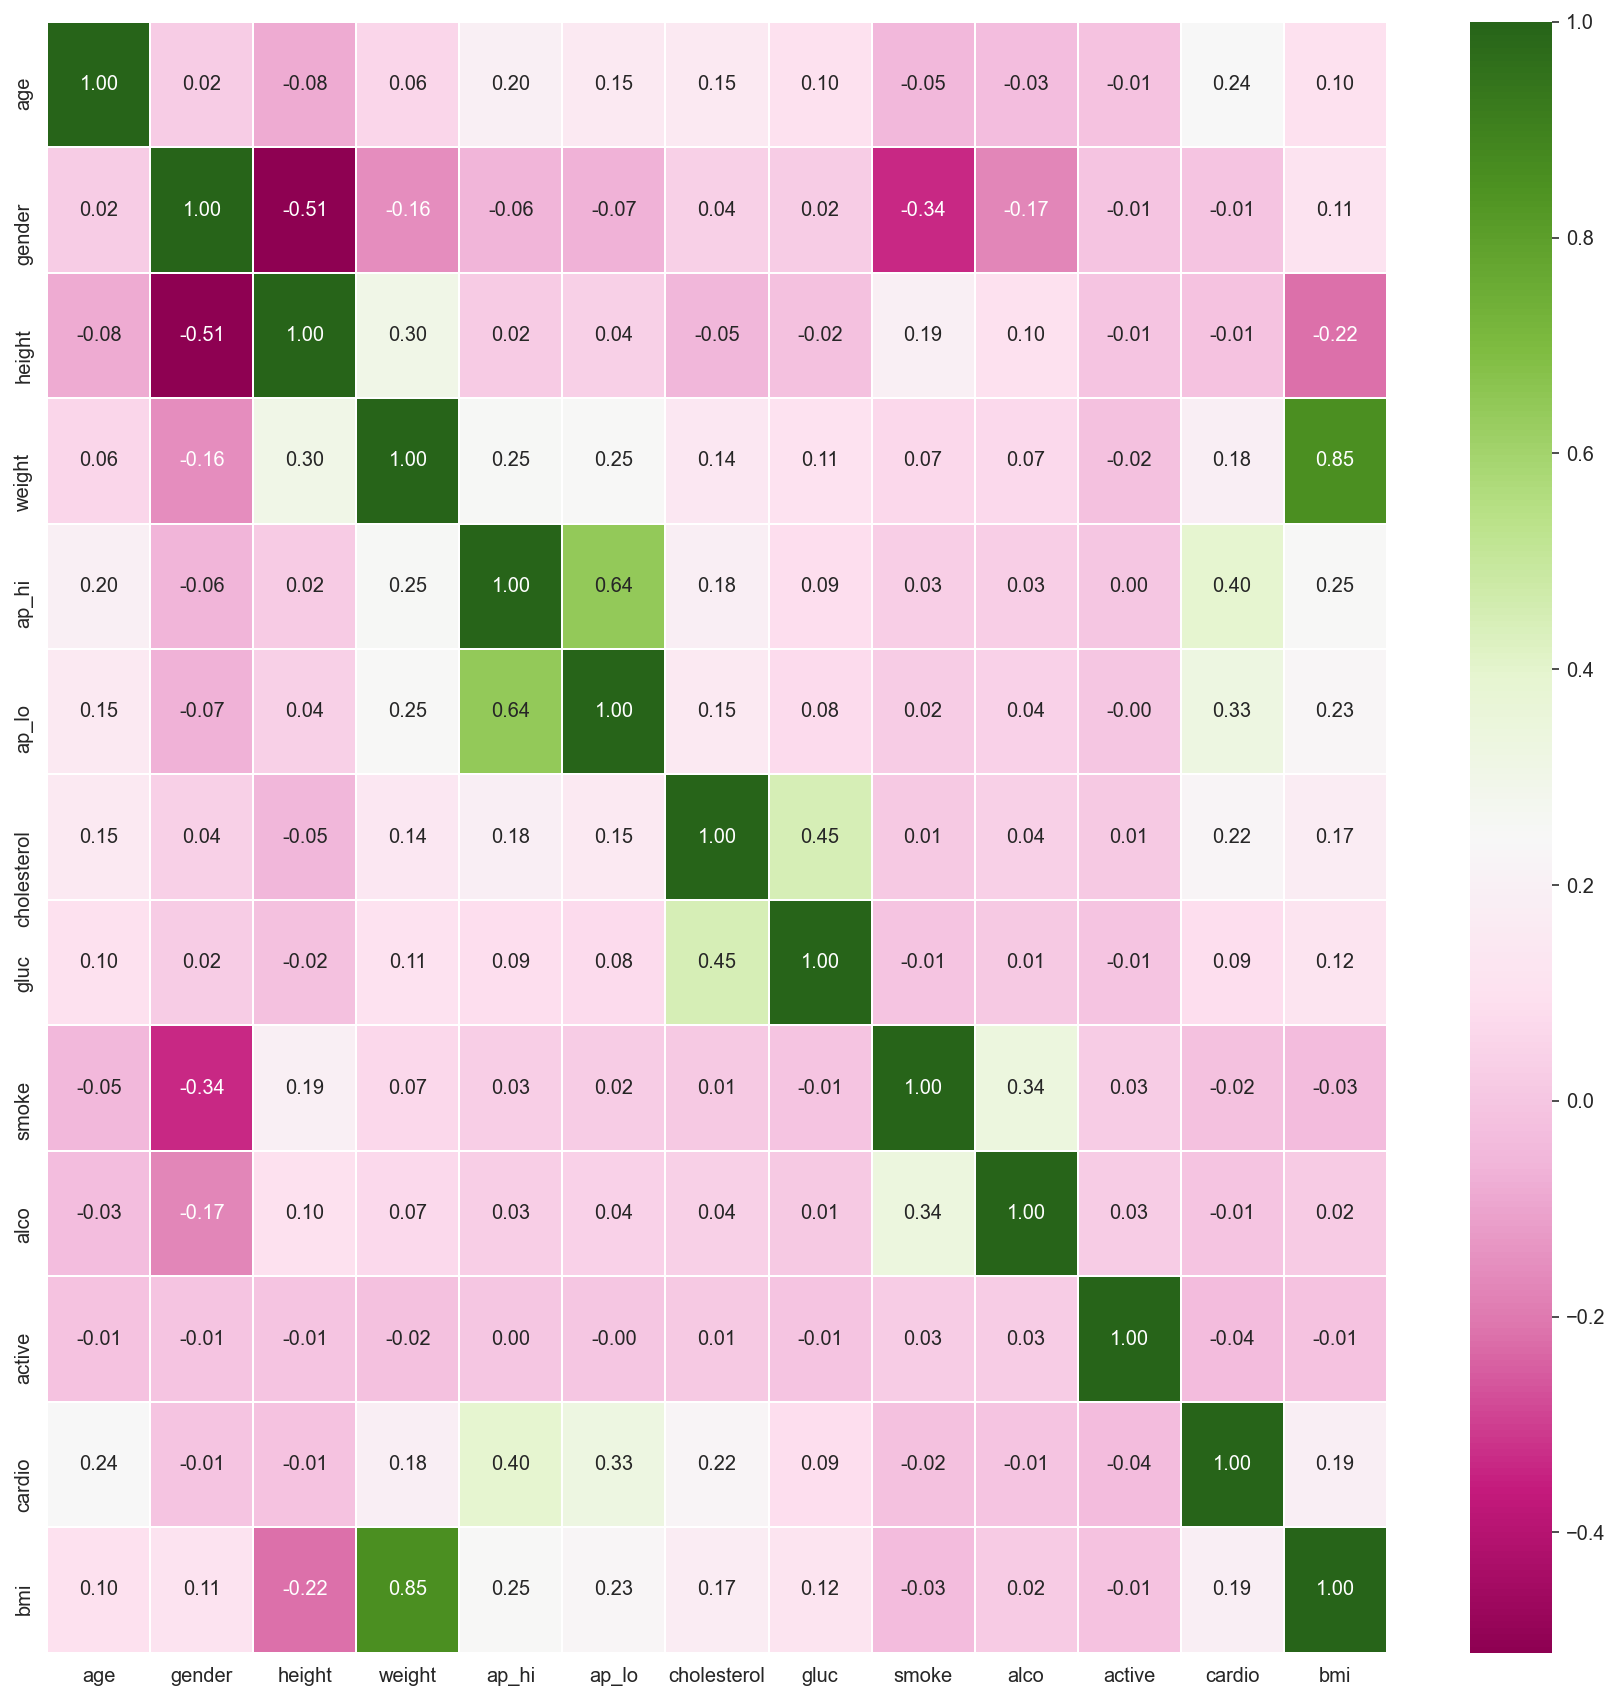

In [28]:
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, ax=ax, cmap="PiYG")

* We can see from correlation map easily; cholesterol level, BMI, blood pressure (ap_hi and ap_low both) and age have a good relationship with cardiovascular diseases.

In [29]:
#drop highly correlated features, and irrelevant feature 
df = df.drop(['weight','height'],axis=1)

In [30]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,61,1,130,80,2,2,0,0,1,0,28.7
1,40,1,110,70,1,1,0,0,1,1,26.7
2,60,1,120,80,1,1,0,0,1,0,25.7
3,39,0,120,80,1,1,1,1,1,0,31.2
4,64,1,120,80,1,1,0,0,1,0,25.8
...,...,...,...,...,...,...,...,...,...,...,...
69296,52,0,120,80,1,1,1,0,1,0,26.9
69297,61,1,140,90,2,2,0,0,1,1,50.5
69298,52,0,180,90,3,1,0,1,0,1,31.4
69299,61,1,135,80,1,2,0,0,0,1,27.1


## Data Exploration

In [31]:
df.cardio.value_counts()

0    34478
1    33783
Name: cardio, dtype: int64

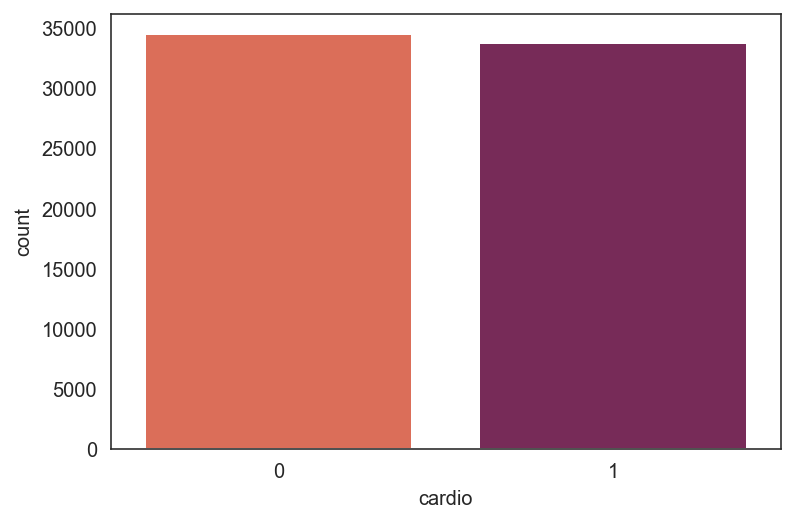

In [32]:
sns.countplot(x="cardio", data=df, palette="rocket_r")
plt.show()

In [33]:
countNoDisease = len(df[df.cardio == 0])
countHaveDisease = len(df[df.cardio == 1])
print("Percentage of Patients Haven't CV Disease: {:.2f}%".format((countNoDisease / (len(df.cardio))*100)))
print("Percentage of Patients Have CV Disease: {:.2f}%".format((countHaveDisease / (len(df.cardio))*100)))

Percentage of Patients Haven't CV Disease: 50.51%
Percentage of Patients Have CV Disease: 49.49%


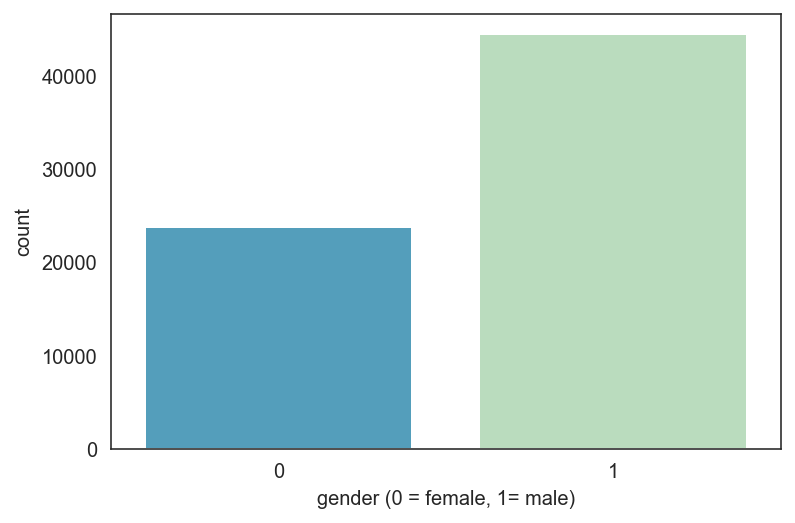

In [34]:
sns.countplot(x='gender', data=df, palette = 'GnBu_r')
plt.xlabel("gender (0 = female, 1= male)")
plt.show()

In [35]:
countFemale = len(df[df.gender == 0])
countMale = len(df[df.gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.gender))*100)))

Percentage of Female Patients: 34.88%
Percentage of Male Patients: 65.12%


In [36]:
df.groupby('cardio').mean()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
cardio,,,,,,,,,,
0,51.225129,0.654997,119.261616,78.123383,1.216051,1.175358,0.092349,0.055485,0.818232,26.477130
1,54.465441,0.647397,133.463458,84.604742,1.515999,1.277595,0.083208,0.051890,0.788562,28.471003


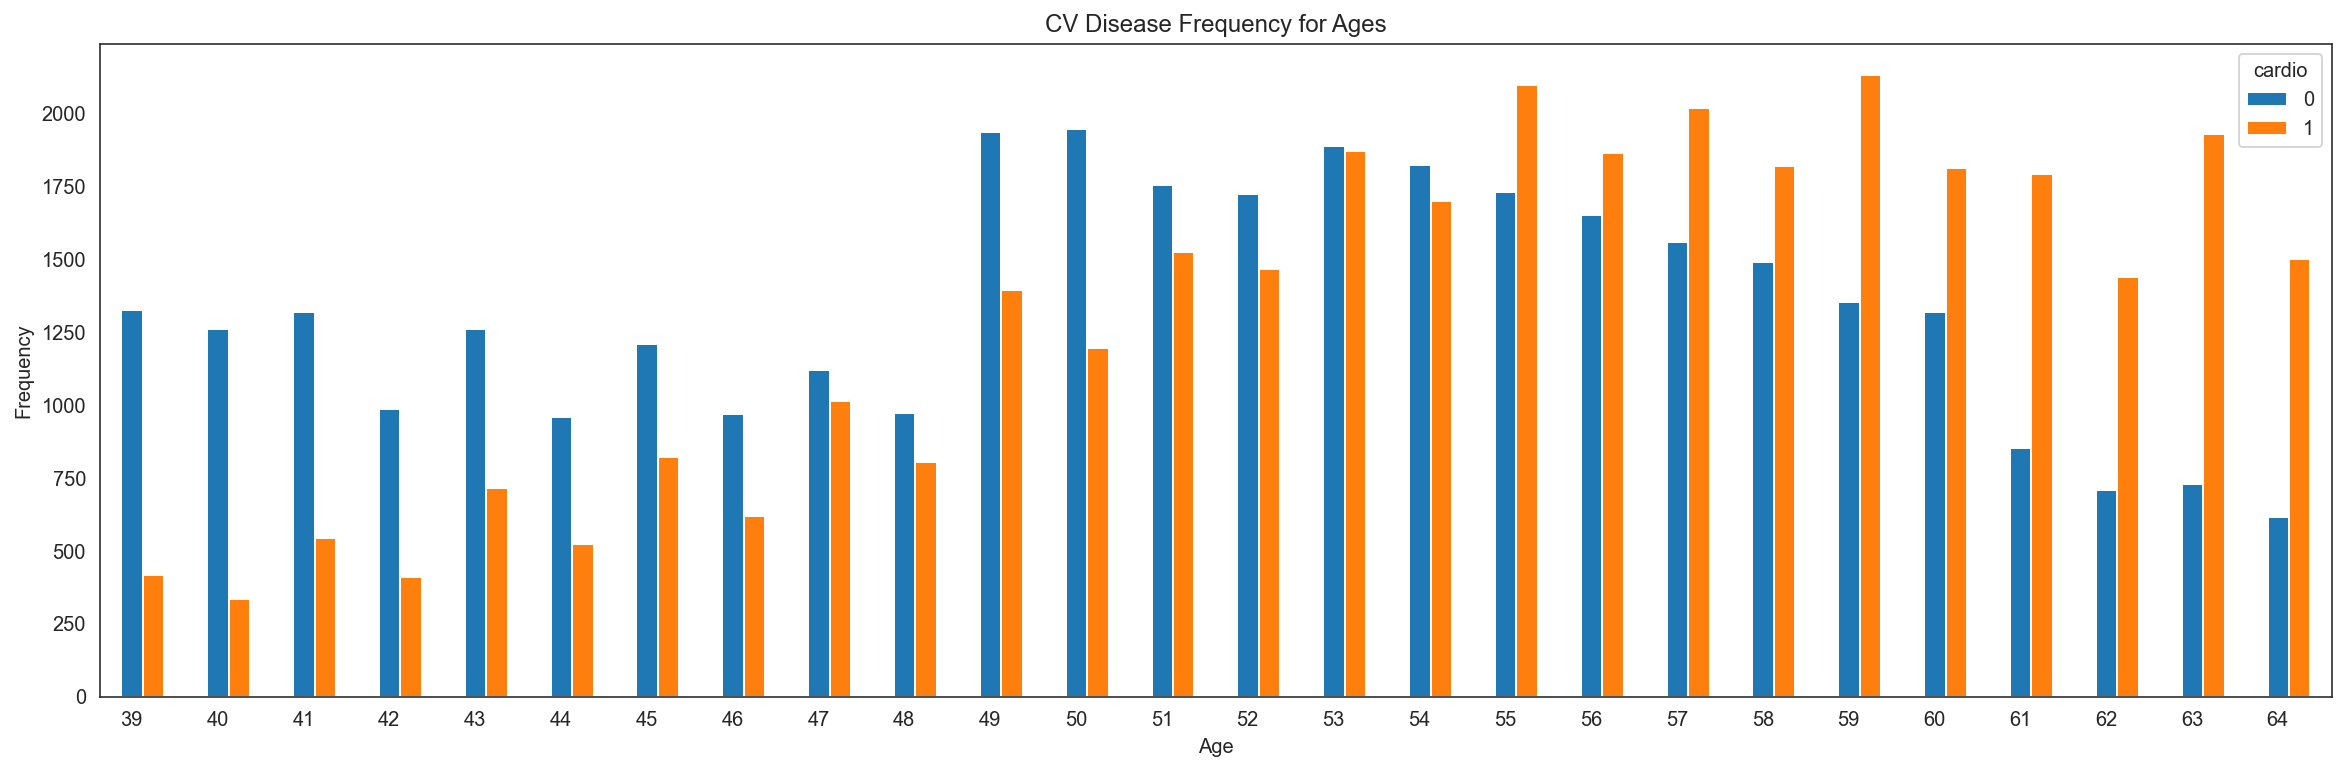

In [37]:
pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
plt.title('CV Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='right')
plt.show()

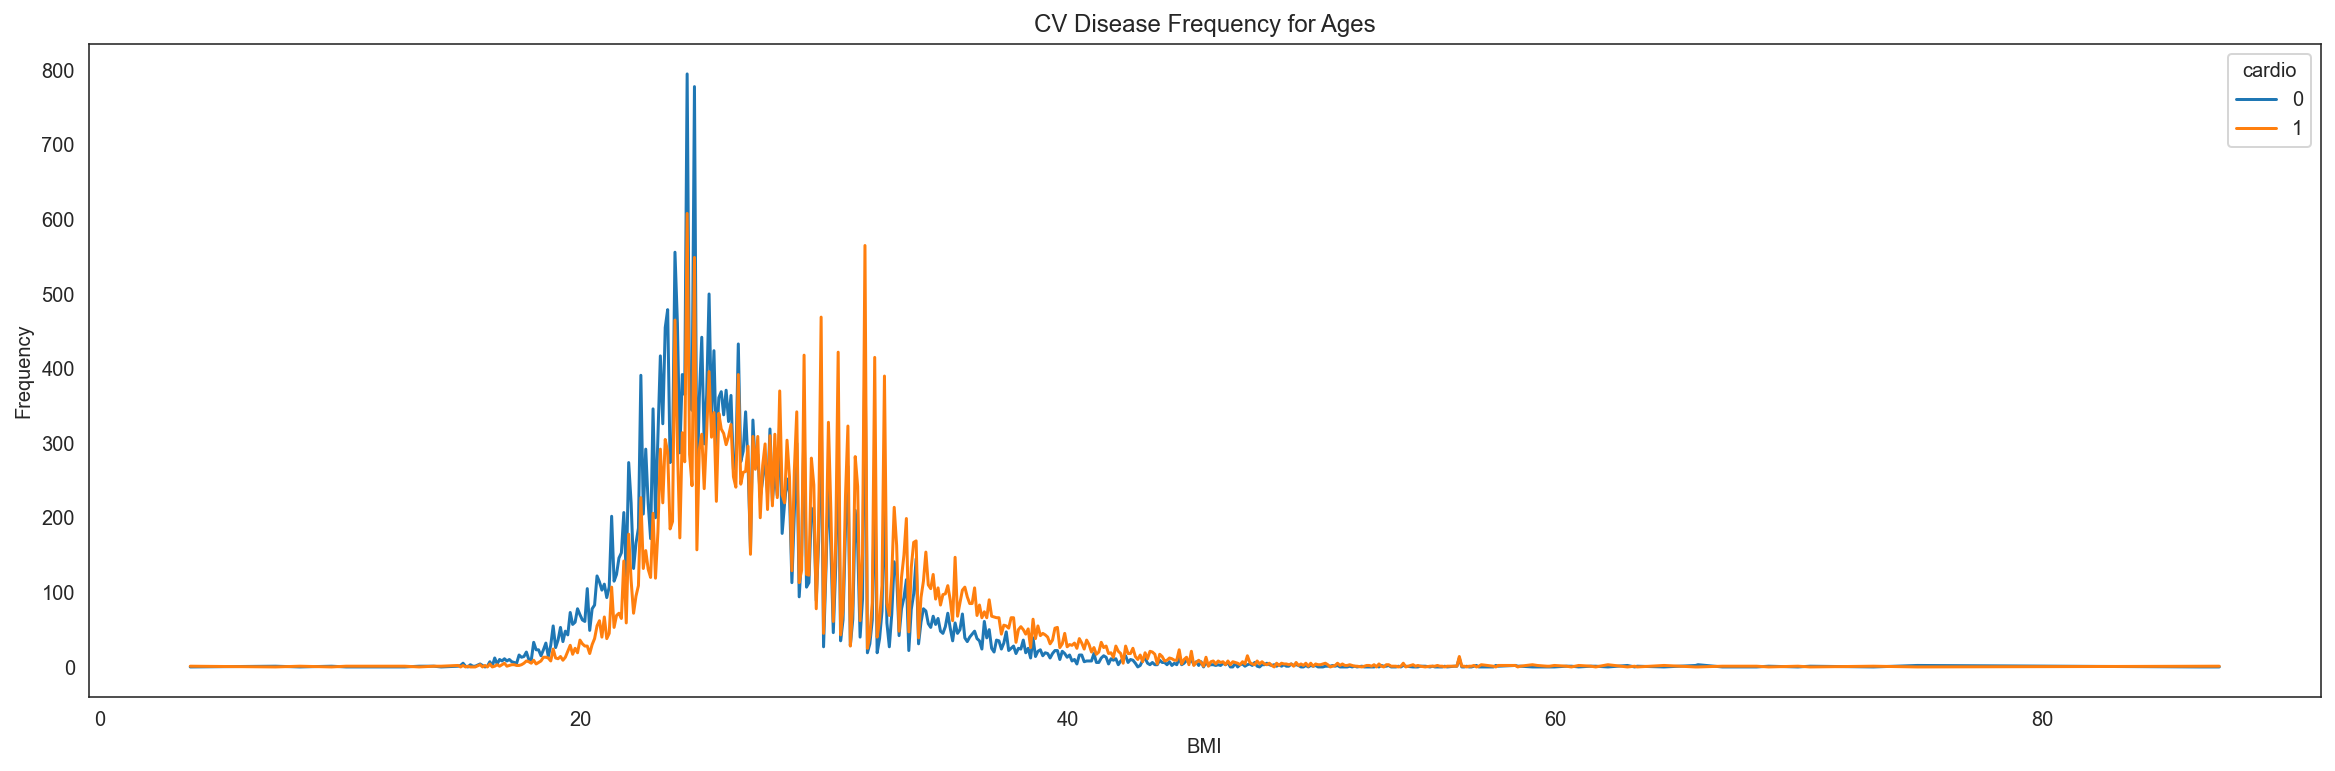

In [38]:
pd.crosstab(df.bmi,df.cardio).plot(kind="line",figsize=(20,6))
plt.title('CV Disease Frequency for Ages')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='right')
plt.show()

As age increases, the frequency of CV Diseases increases. 

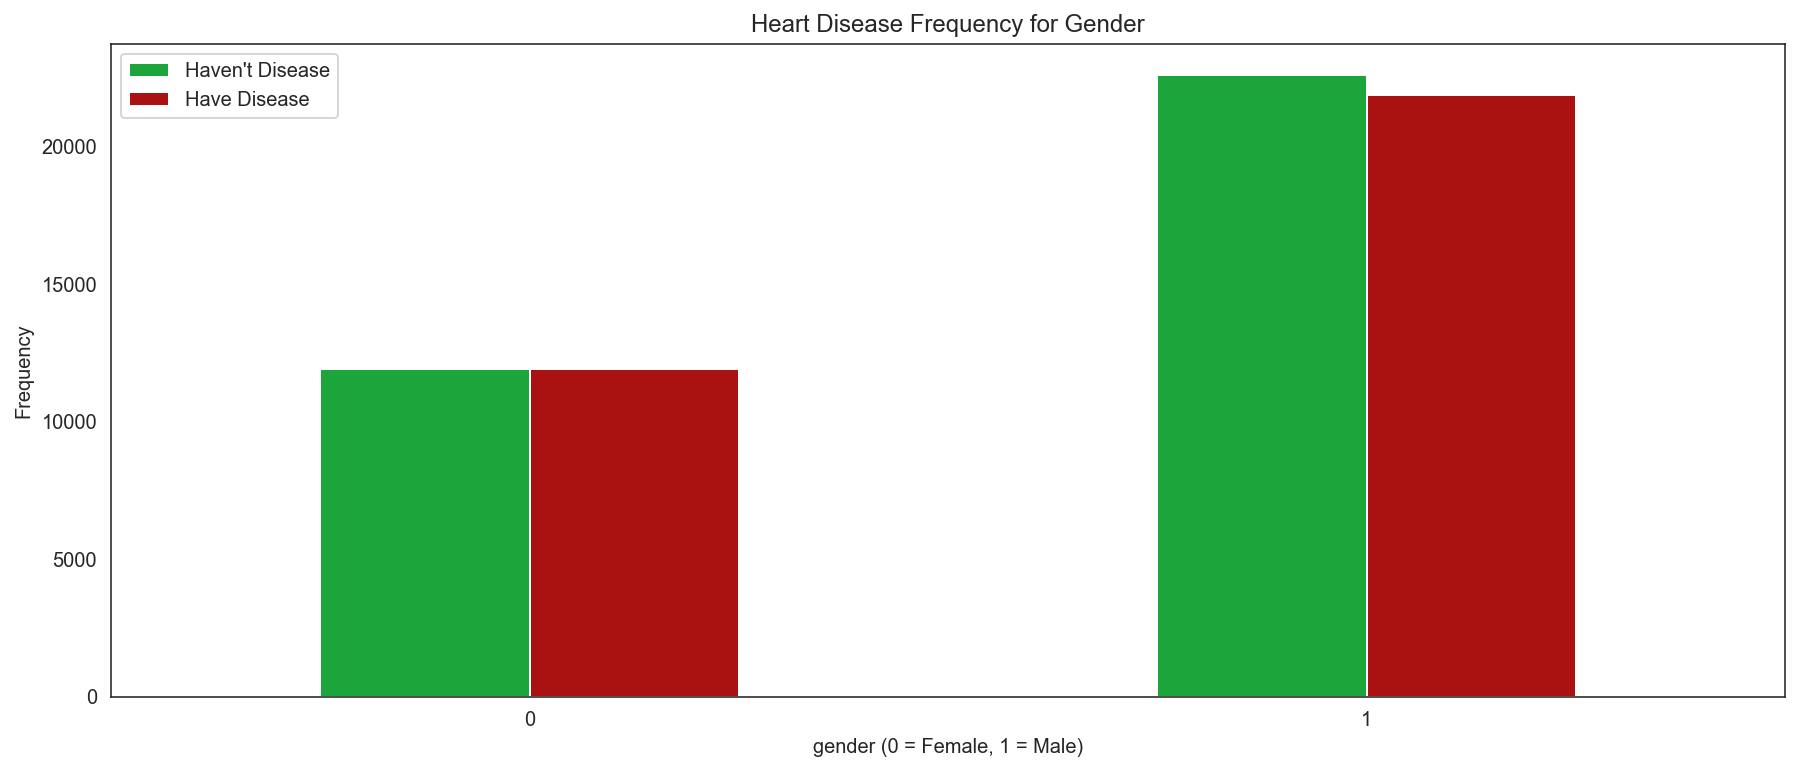

In [39]:
pd.crosstab(df.gender,df.cardio).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

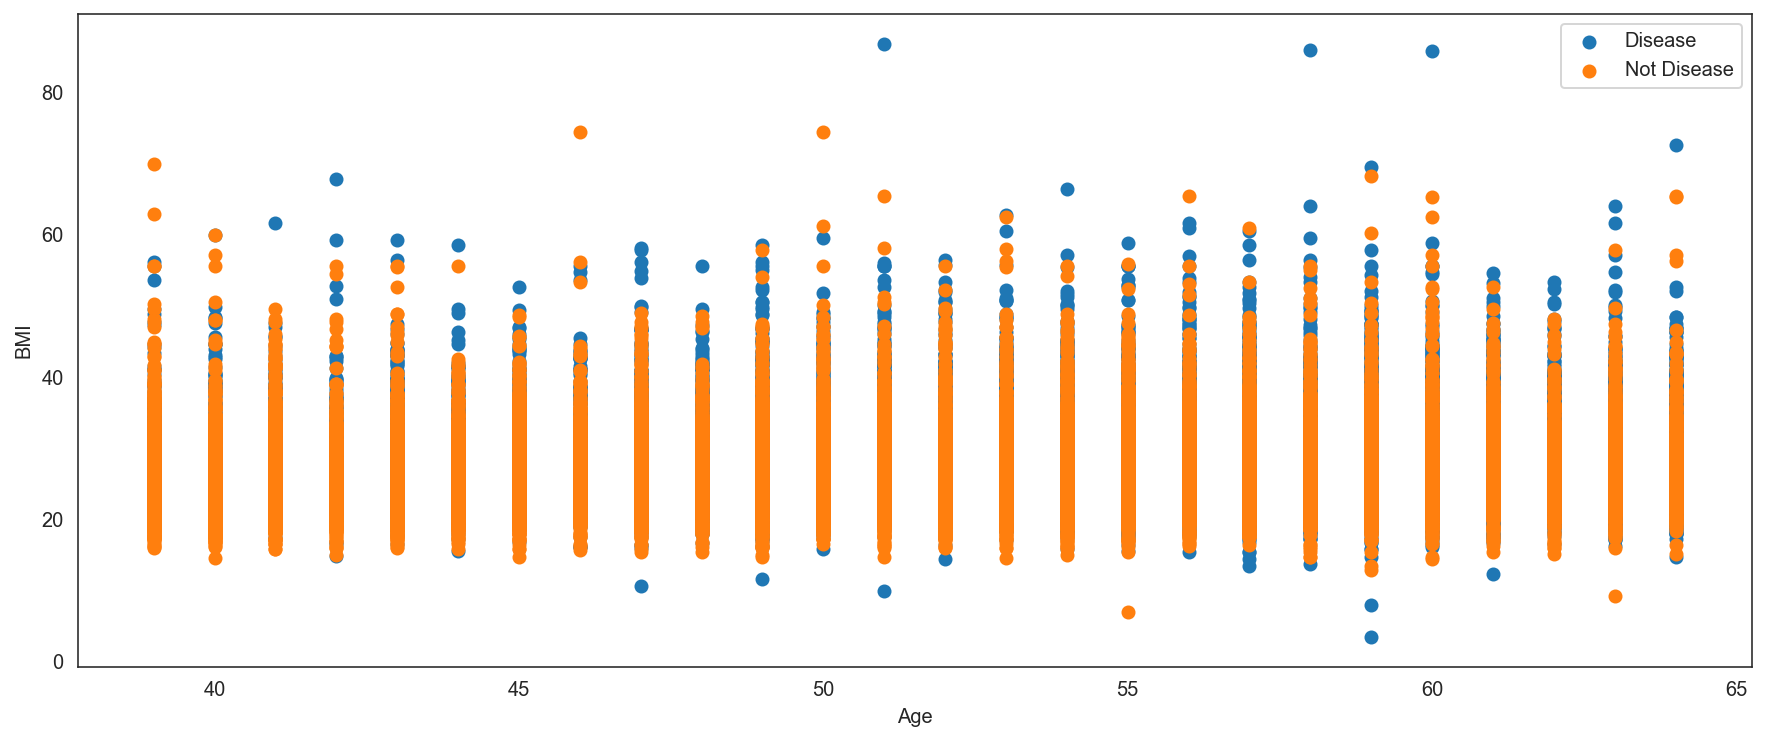

In [40]:
plt.figure(figsize=(15,6)) 
plt.scatter(x=df.age[df.cardio==1], y=df.bmi[(df.cardio==1)])
plt.scatter(x=df.age[df.cardio==0], y=df.bmi[(df.cardio==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

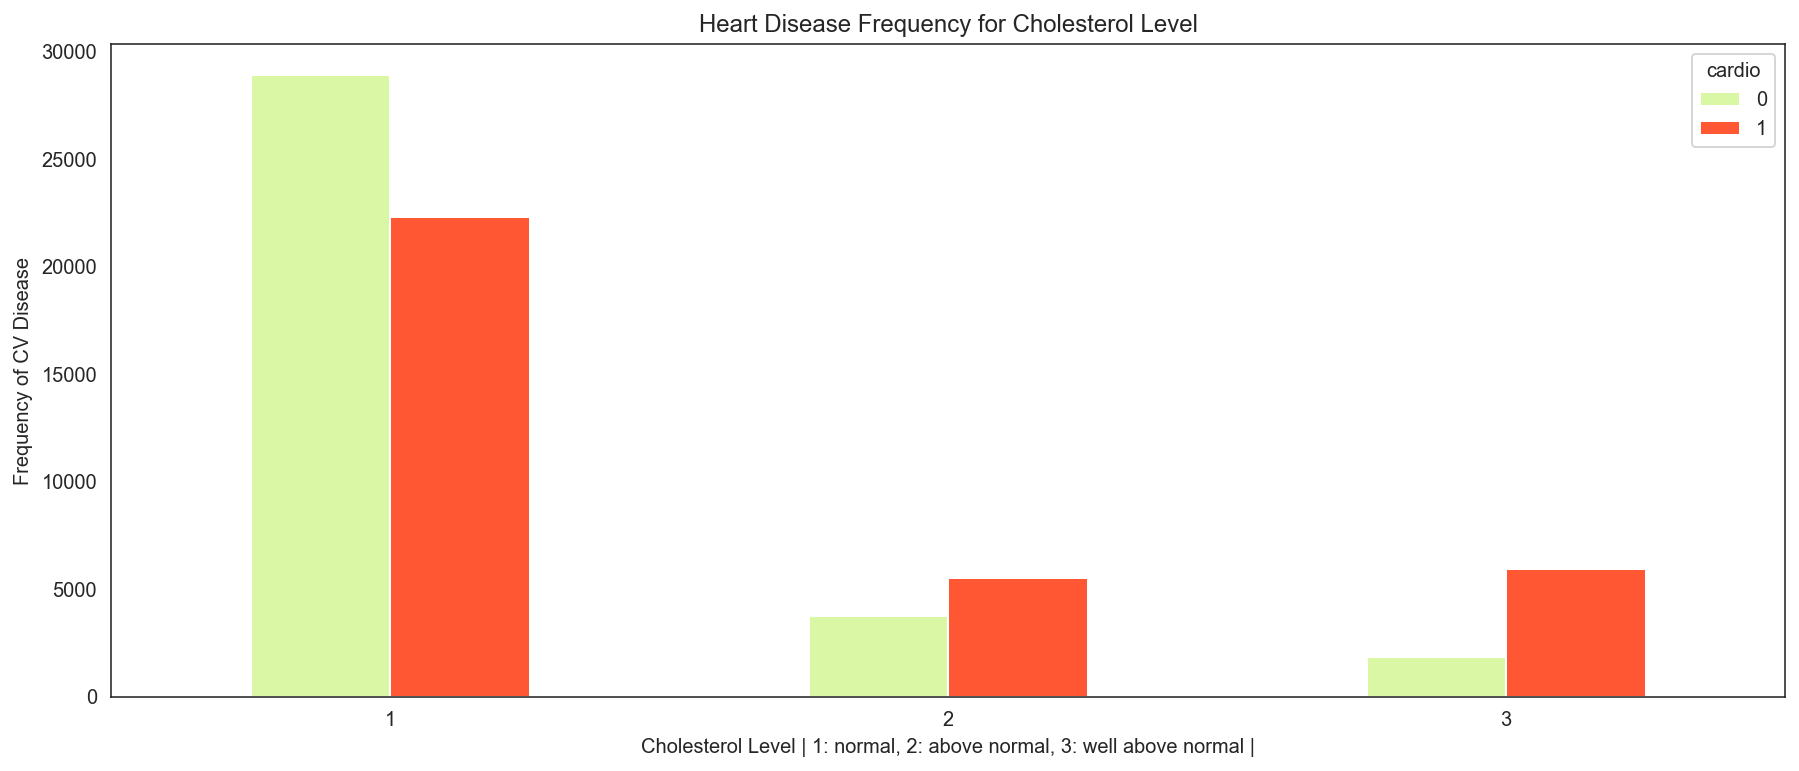

In [41]:
pd.crosstab(df.cholesterol,df.cardio).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Cholesterol Level')
plt.xlabel('Cholesterol Level | 1: normal, 2: above normal, 3: well above normal |')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of CV Disease')
plt.show()

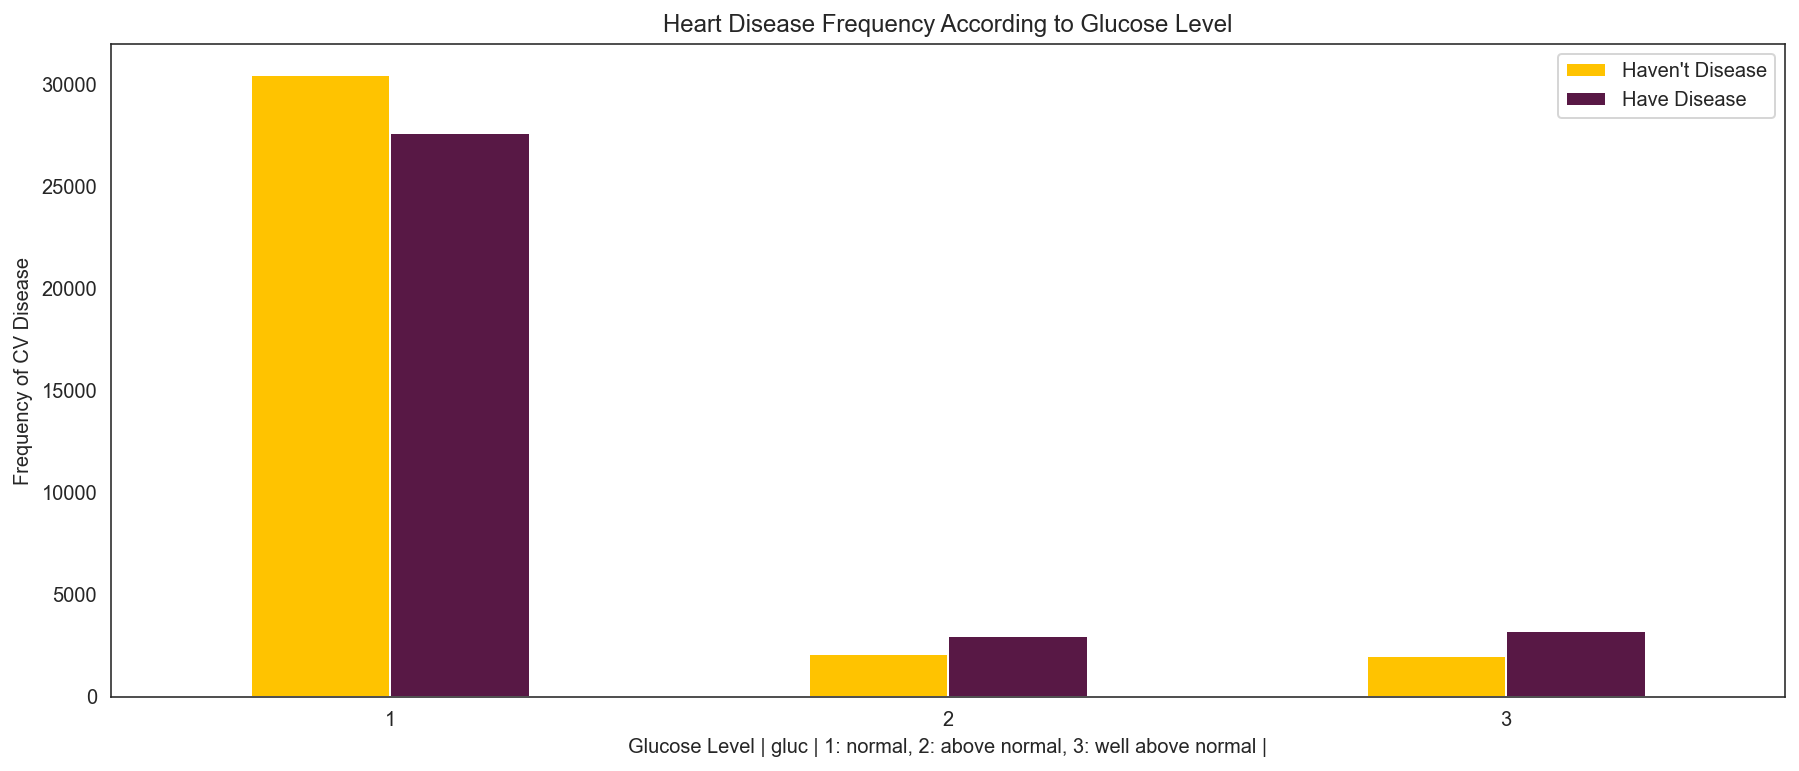

In [42]:
pd.crosstab(df.gluc,df.cardio).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According to Glucose Level')
plt.xlabel('Glucose Level | gluc | 1: normal, 2: above normal, 3: well above normal |')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of CV Disease')
plt.show()

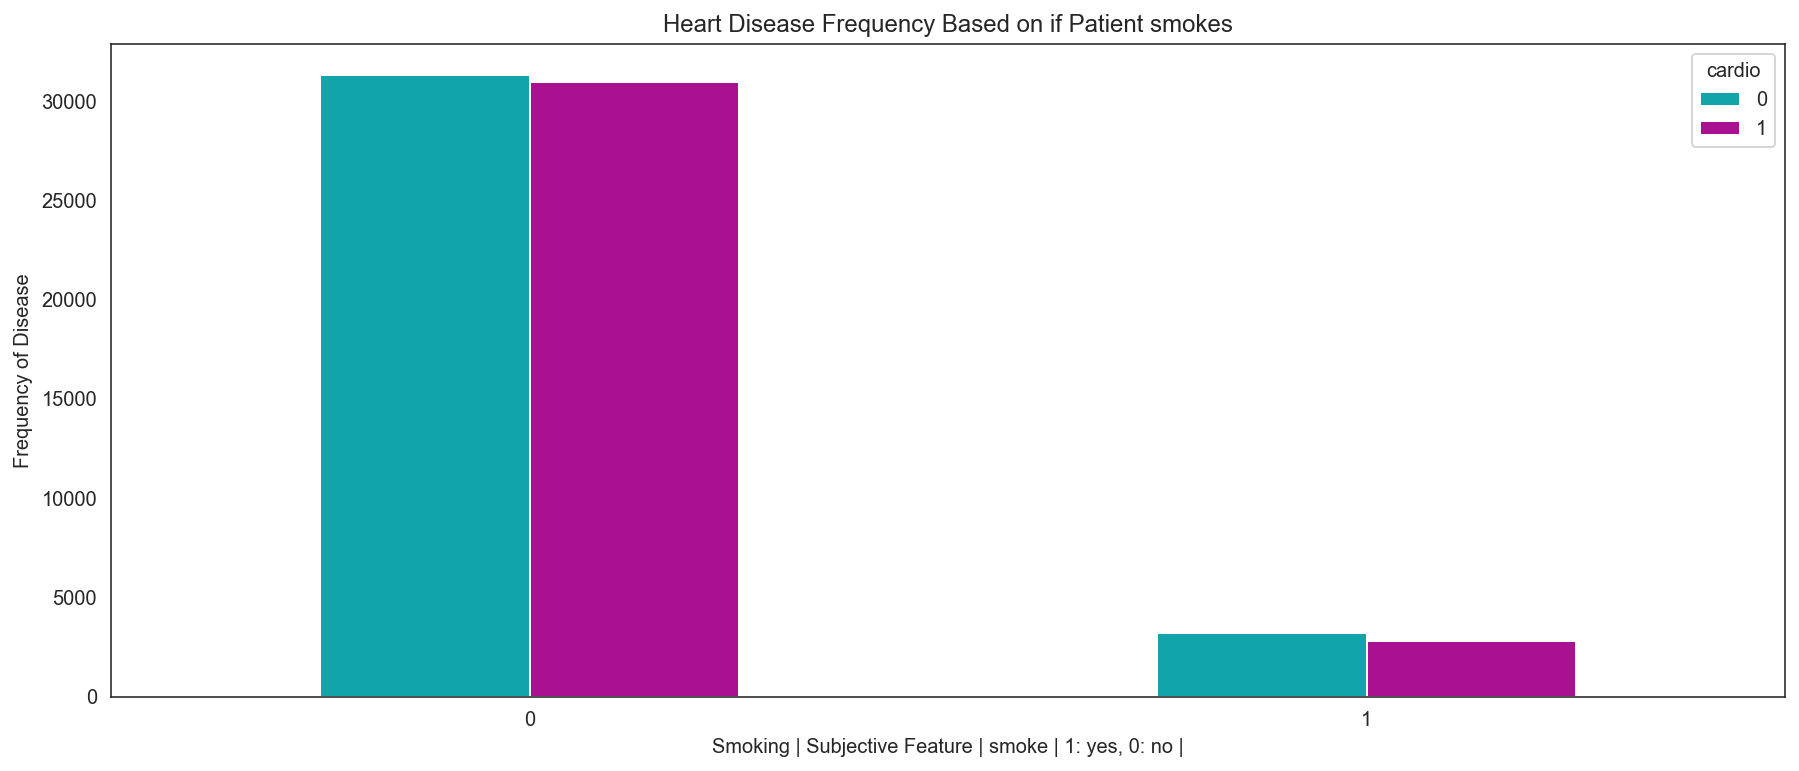

In [43]:
pd.crosstab(df.smoke,df.cardio).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency Based on if Patient smokes')
plt.xlabel('Smoking | Subjective Feature | smoke | 1: yes, 0: no |')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease')
plt.show()

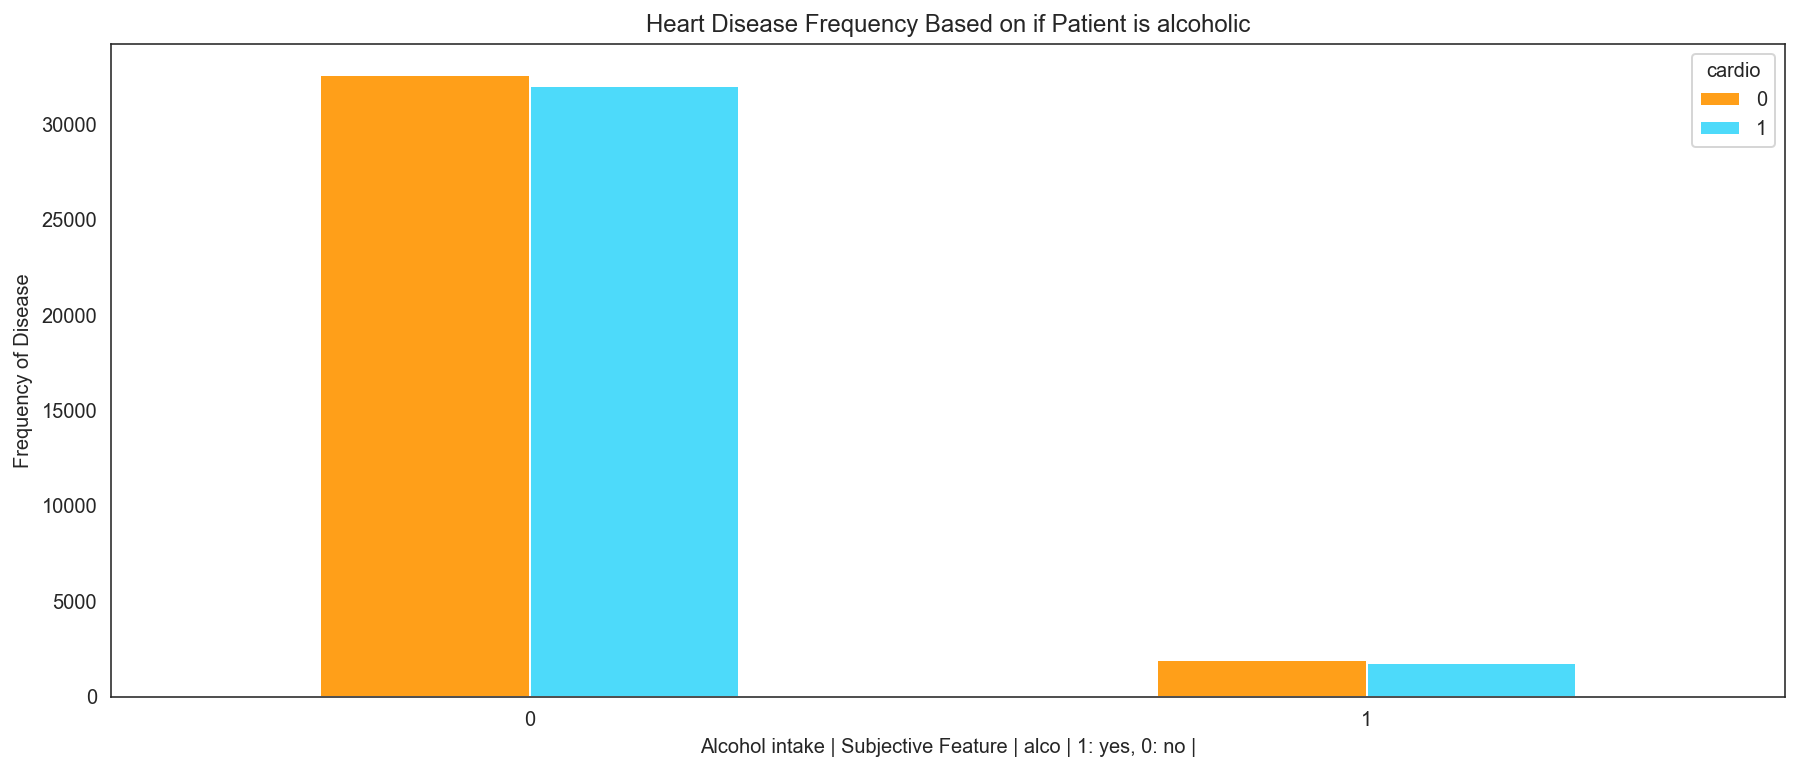

In [44]:
pd.crosstab(df.alco,df.cardio).plot(kind="bar",figsize=(15,6),color=['#ff9f19','#4ddafa' ])
plt.title('Heart Disease Frequency Based on if Patient is alcoholic')
plt.xlabel('Alcohol intake | Subjective Feature | alco | 1: yes, 0: no |')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease')
plt.show()

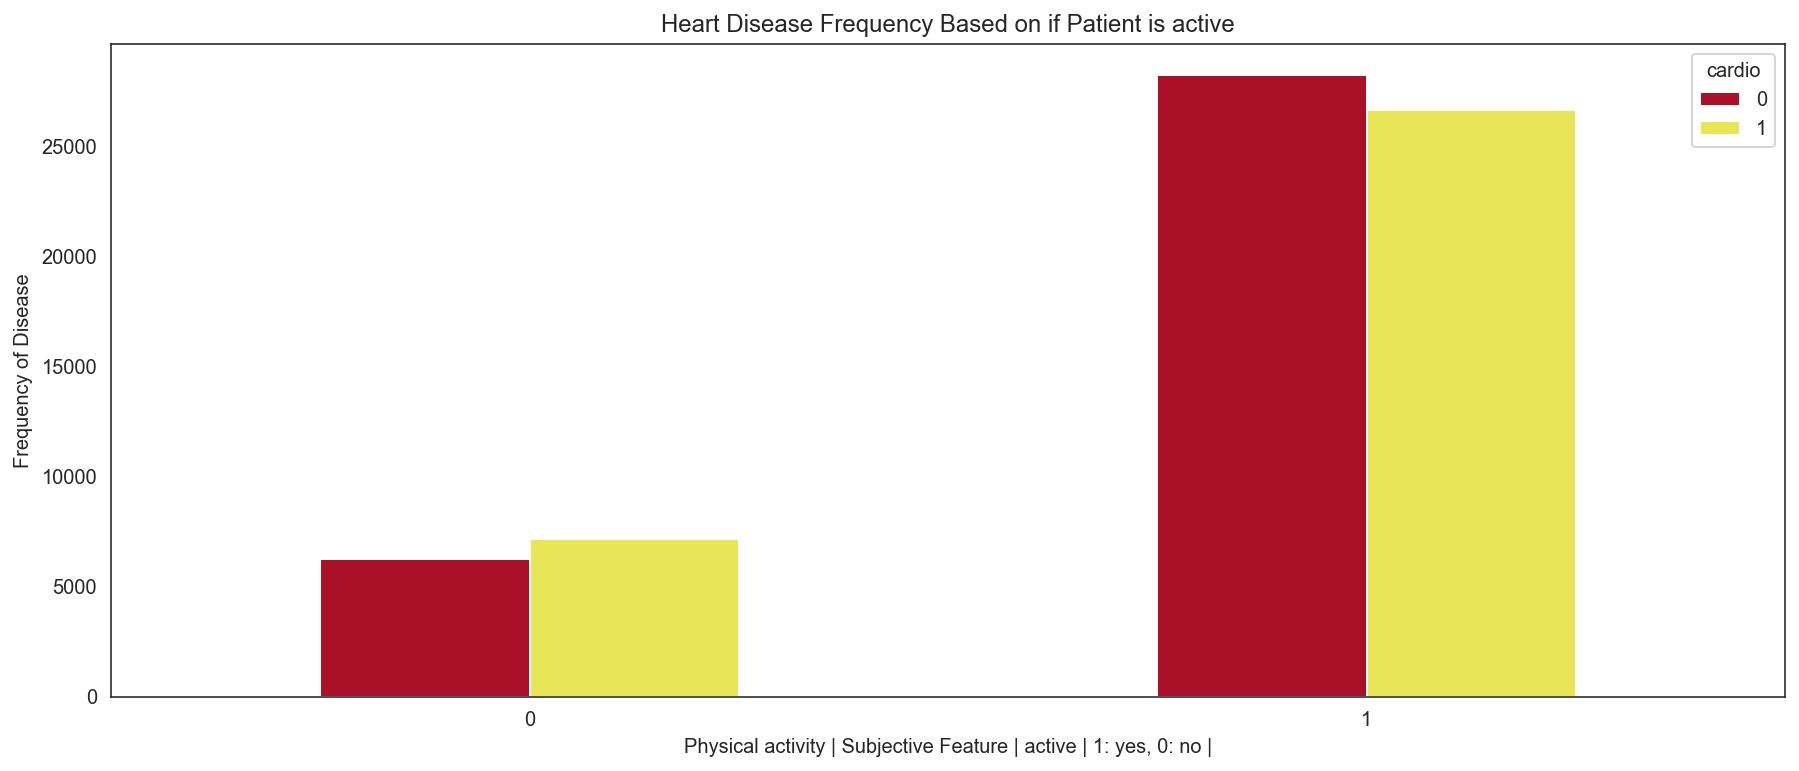

In [45]:
pd.crosstab(df.active,df.cardio).plot(kind="bar",figsize=(15,6),color=['#aa1128','#e8e656'])
plt.title('Heart Disease Frequency Based on if Patient is active')
plt.xlabel('Physical activity | Subjective Feature | active | 1: yes, 0: no |')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease')
plt.show()

### Creating Dummy Variables

Since 'cholesterol' and 'gluc' are categorical variables we'll turn them into dummy variables.

In [46]:
# a = pd.get_dummies(df['cholesterol'], prefix = "cholesterol",drop_first=True)
# b = pd.get_dummies(df['gluc'], prefix = "gluc",drop_first=True)

In [47]:
# frames = [df, a, b]
# df = pd.concat(frames, axis = 1)
# df.head()

In [48]:
# df = df.drop(columns = ['cholesterol', 'gluc'])
# df.head()

### Feature Selection / Feature Importance 

In [49]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#### Using LassoCV 

In [50]:
y=df['cardio']
X=df.drop(['cardio'],axis=1)

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003550
Best score using built-in LassoCV: 0.213829


In [51]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

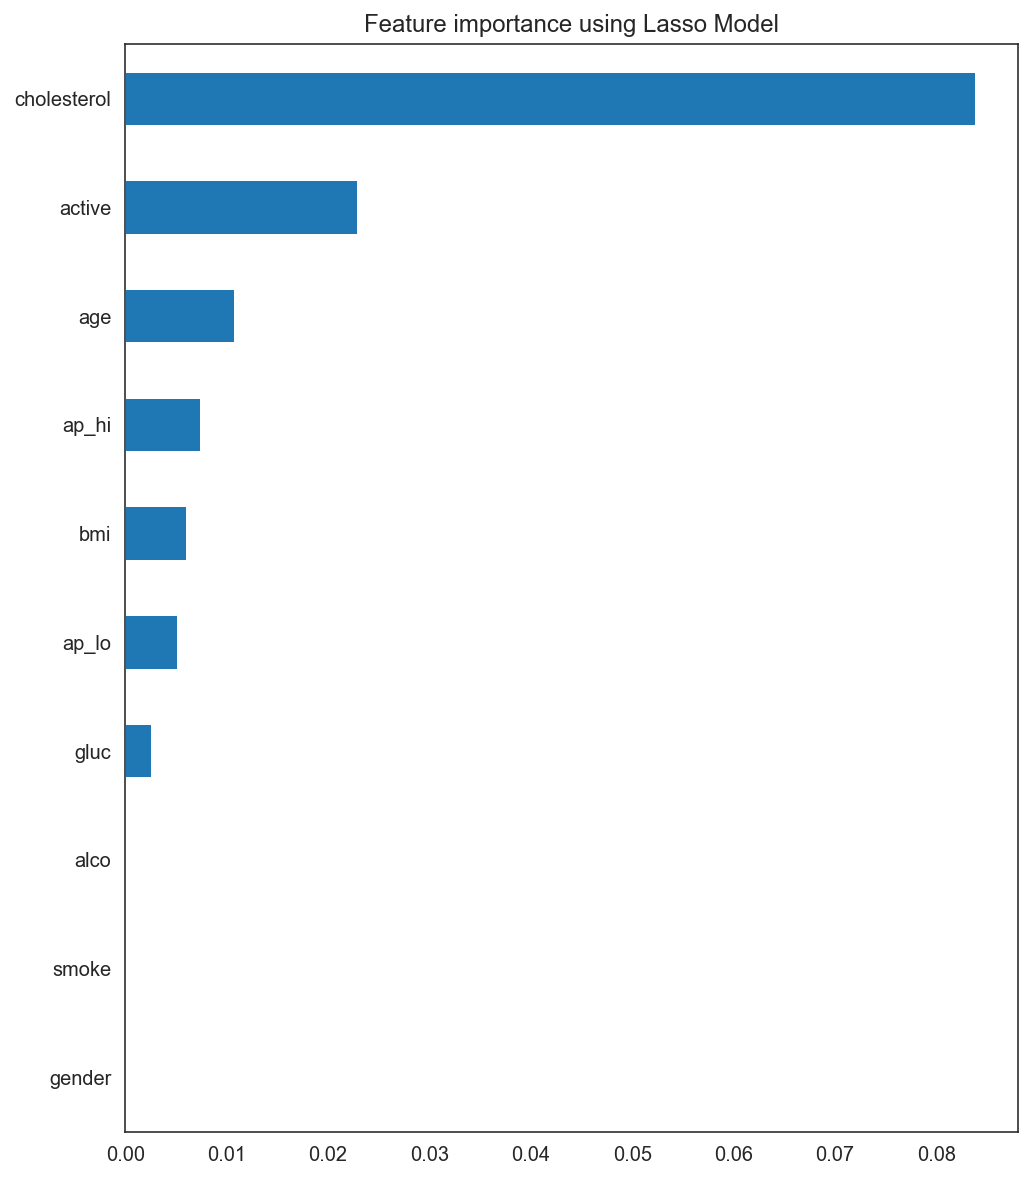

In [52]:
imp_coef = abs(coef.sort_values()).sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [53]:
#drop insignificant features as determined by LassoCV
df2 = df.drop(['alco','smoke','gender'],axis=1)

In [54]:
#Recheck again on LassoCV
y=df2['cardio']
X=df2.drop(['cardio'],axis=1)

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003550
Best score using built-in LassoCV: 0.213829


In [55]:
imp_coef

gender         0.000000
smoke          0.000000
alco           0.000000
gluc           0.002623
ap_lo          0.005199
bmi            0.006040
ap_hi          0.007422
age            0.010847
active         0.022992
cholesterol    0.083875
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

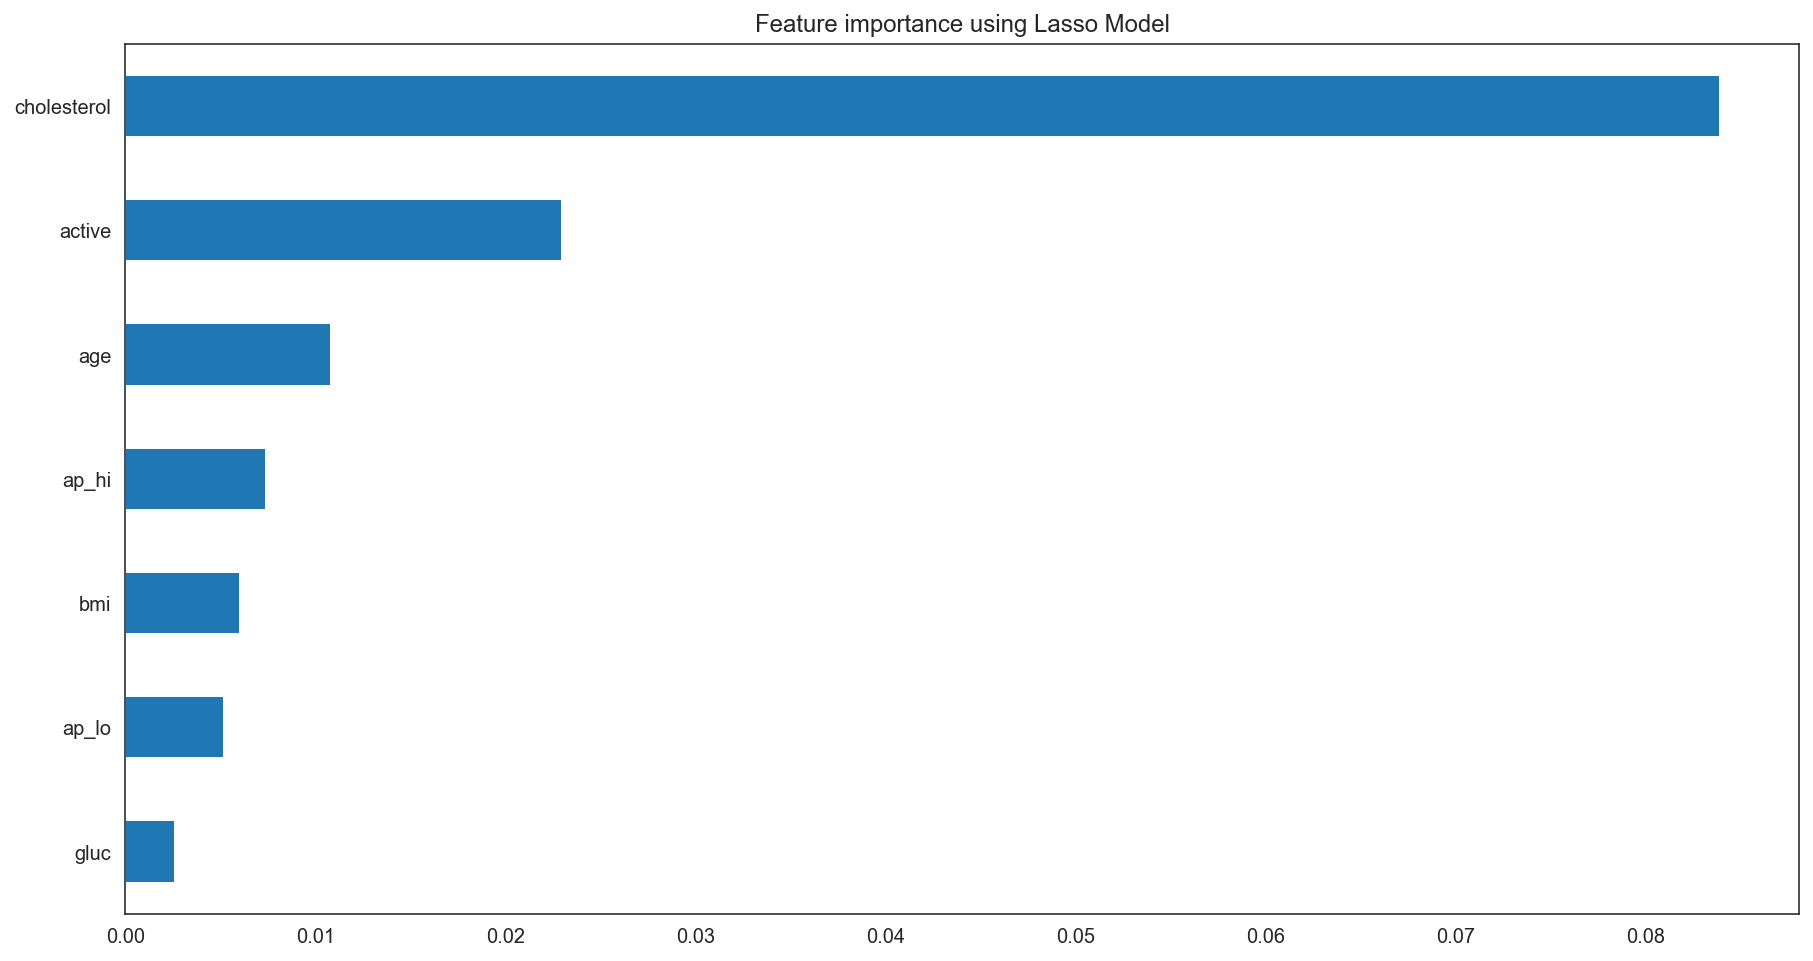

In [56]:
imp_coef = abs(coef.sort_values()).sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Using Random Forest 

In [57]:
my_list = list(df.drop(['cardio'],axis=1))
my_list

['age',
 'gender',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bmi']

Feature ranking:
1. bmi (0.428783)
2. ap_hi (0.209627)
3. age (0.153714)
4. ap_lo (0.117565)
5. cholesterol (0.049863)
6. gluc (0.014158)
7. gender (0.008289)
8. active (0.006650)
9. smoke (0.005807)
10. alco (0.005544)


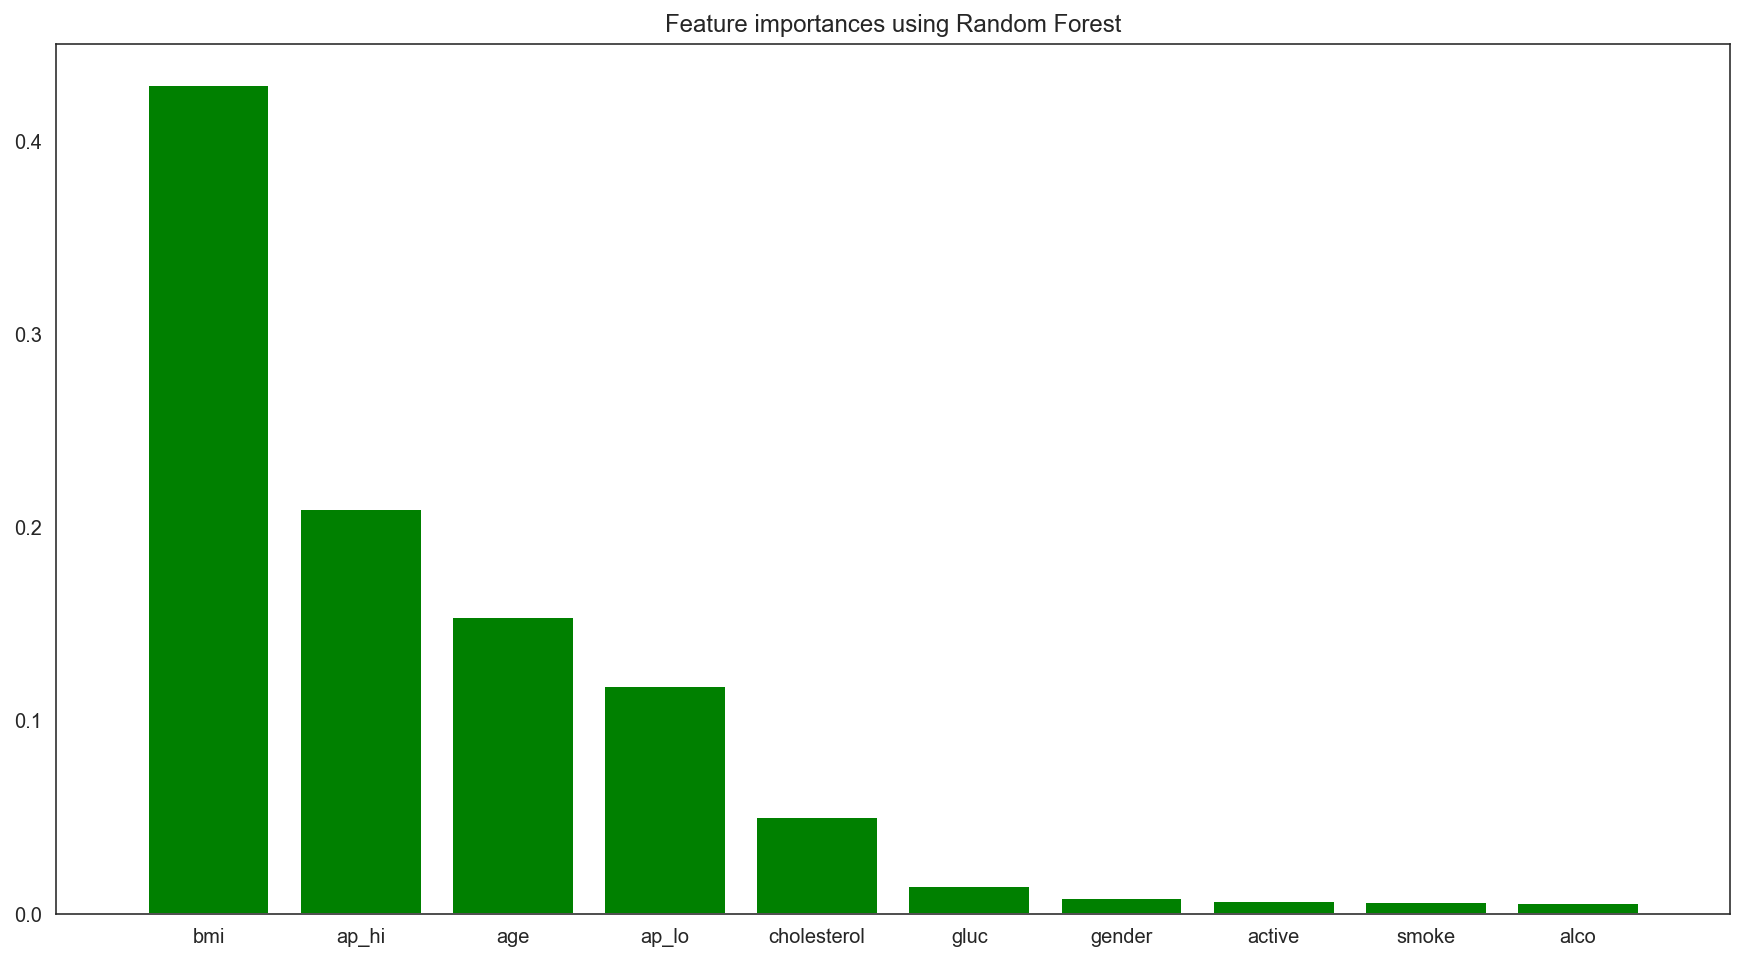

In [58]:
#rf.feature_importance

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250, #n_estimators: no. of trees
                              random_state=9)
y=df['cardio']
X=df.drop(['cardio'],axis=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
importance_list=[]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, my_list[indices[f]], importances[indices[f]]))
    importance_list.append(my_list[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances using Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
        color="g")
plt.xticks(range(X.shape[1]), importance_list)
plt.xlim([-1, X.shape[1]])
plt.show()

In [59]:
#drop insignificant features as determined by LassoCV and RF
df = df.drop(['alco','smoke','gender'],axis=1)

In [60]:
df

,age,ap_hi,ap_lo,cholesterol,gluc,active,cardio,bmi
0,61,130,80,2,2,1,0,28.7
1,40,110,70,1,1,1,1,26.7
2,60,120,80,1,1,1,0,25.7
3,39,120,80,1,1,1,0,31.2
4,64,120,80,1,1,1,0,25.8
...,...,...,...,...,...,...,...,...
69296,52,120,80,1,1,1,0,26.9
69297,61,140,90,2,2,1,1,50.5
69298,52,180,90,3,1,0,1,31.4
69299,61,135,80,1,2,0,1,27.1


In [61]:
my_list = list(df.drop(['cardio'],axis=1))
my_list

['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active', 'bmi']

Feature ranking:
1. bmi (0.445238)
2. ap_hi (0.221545)
3. age (0.145916)
4. ap_lo (0.118081)
5. cholesterol (0.053259)
6. gluc (0.011126)
7. active (0.004836)


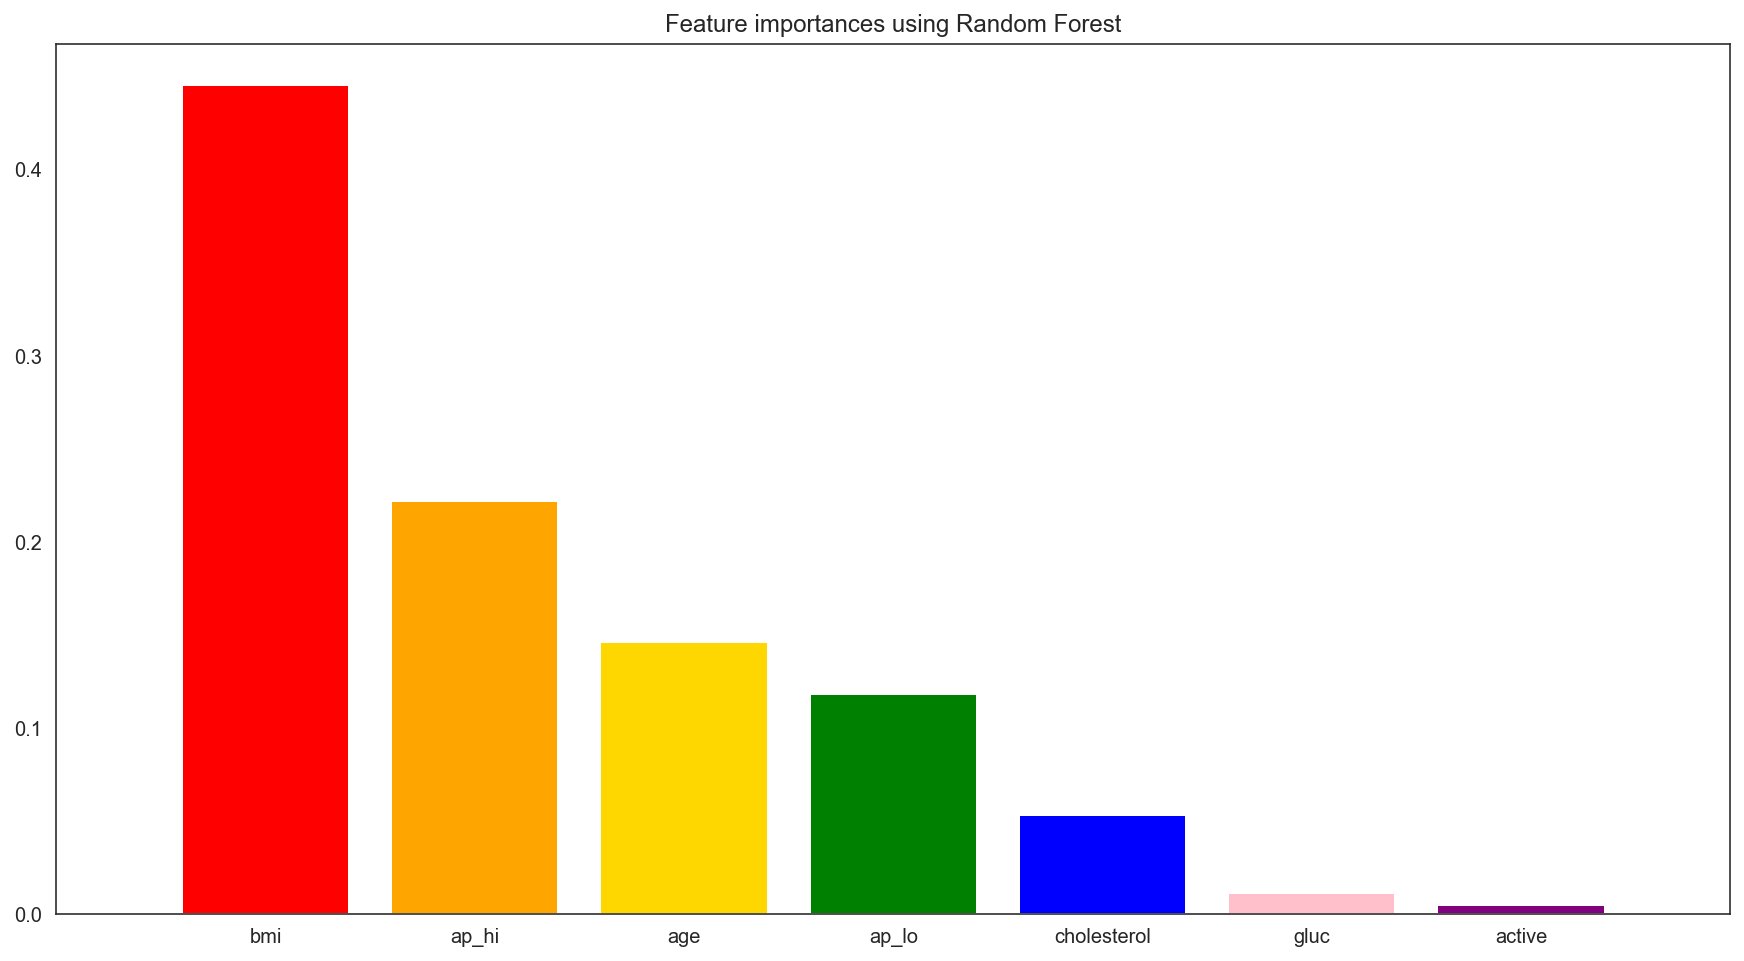

In [62]:
y=df['cardio']
X=df.drop(['cardio'],axis=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
importance_list=[]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, my_list[indices[f]], importances[indices[f]]))
    importance_list.append(my_list[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances using Random Forest")
plt.bar(range(X.shape[1]), importances[indices], 
        color=['red', 'orange', 'gold', 'green', 'blue','pink','purple','indigo'])
plt.xticks(range(X.shape[1]), importance_list)
plt.xlim([-1, X.shape[1]])
plt.show()

In [63]:
df.to_csv (r'C:\Users\HP\Metis\my_third_project\detect cardiovascular-cleaned 2.csv', index = False, header=True)